# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Patch
import matplotlib.patches as patches
import seaborn as sns
from pypinyin import lazy_pinyin, Style
#pip install pypinyin

# import data

In [2]:
bcr_path = 'Data_1/shanghai_bcr.csv'
bcr_2023 = pd.read_csv(bcr_path, encoding='utf-8-sig')
bcr_2023.head(5)

,name,location,location_1,date,time,services,longitude,latitude
0,合生汇,翔殷路1099号L1层,翔殷路1099号L1层,1-7,10:00-22:00,母婴室,121.525085,31.305877
1,合生汇,翔殷路1099号L3层,翔殷路1099号L3层,1-7,10:00-22:00,母婴室,121.525085,31.305877
2,合生汇,翔殷路1099号L4层,翔殷路1099号L4层,1-7,10:00-22:00,母婴室,121.525085,31.305877
3,合生汇,翔殷路1099号L5层,翔殷路1099号L5层,1-7,10:00-22:00,母婴室,121.525085,31.305877
4,合生汇,翔殷路1099号B2层,翔殷路1099号B2层,1-7,10:00-22:00,母婴室,121.525085,31.305877
...,...,...,...,...,...,...,...,...
95,宝山区顾村镇社区卫生服务中心,上海市宝山区顾村镇水产西路1138号北三楼预防接种门诊,上海市宝山区顾村镇水产西路1138号北三楼预防接种门诊,1-6,08:00-11:15,婴儿喂哺、婴儿护理（换尿布）、桌子（放置奶瓶）、洗手池（冷热水）、婴儿床,121.415340,31.358324
96,宝山区淞南镇社区卫生服务中心,上海市淞良路301号公共卫生楼接种室（107室）留观大厅,上海市淞良路301号公共卫生楼接种室（107室）留观大厅,1-5,08:00-11:30,婴儿喂哺、婴儿护理（换尿布）,121.495614,31.347814
97,嘉尚门诊,上海市江湾城路99号3号楼二楼儿保门诊旁边,上海市江湾城路99号3号楼,1-6,08:00-18:00,婴儿喂哺、婴儿护理（换尿布）,121.515533,31.322037
98,宝山区顾村镇菊泉新城社区卫生服务中心,上海市菊盛路218号二楼预防接种门诊大厅,上海市菊盛路218号二楼预防接种门诊大厅,1-5,00:00-24:00,婴儿喂哺、婴儿护理（换尿布）,121.378687,31.358343


In [3]:
uc_path = 'Data_1/urban_comparison.csv'
uc = pd.read_csv(uc_path, encoding='utf-8-sig')
uc.head()

,city,baby_care_rooms_2019,newborns_2019_1,newborns_2019_2,baby_care_rooms_2023,newborns_2023_1,newborns_2023_2,rooms_per_1000_newborns_2019,rooms_per_1000_newborns_2023,rooms_per_10000_newborns_2019,rooms_per_10000_newborns_2023
0,Shanghai,301,169000,16.90,1253,98000,9.80,1.78,12.79,17.81,127.86
1,Hong Kong,595,52856,5.29,662,33288,3.33,11.26,19.89,112.57,198.87
2,Taipei,680,21468,2.15,538,16027,1.60,31.68,33.57,316.75,335.68
3,Tokyo,5092,76725,7.67,7955,65680,6.57,66.37,121.12,663.67,1211.18


# preprocessing data

## check data

## type

In [4]:
bcr_2023_types = bcr_2023.dtypes
print(bcr_2023_types)

name           object
location       object
location_1     object
date           object
time           object
services       object
longitude     float64
latitude      float64
dtype: object


In [5]:
uc_types = uc.dtypes
print(uc_types)

city                              object
baby_care_rooms_2019               int64
newborns_2019_1                    int64
newborns_2019_2                  float64
baby_care_rooms_2023               int64
newborns_2023_1                    int64
newborns_2023_2                  float64
rooms_per_1000_newborns_2019     float64
rooms_per_1000_newborns_2023     float64
rooms_per_10000_newborns_2019    float64
rooms_per_10000_newborns_2023    float64
dtype: object


## NaN

In [6]:
rows_with_nan = bcr_2023[bcr_2023.isnull().any(axis=1)]

if not rows_with_nan.empty:
    print("The following rows contain NaN values:")
    print(rows_with_nan)
else:
    print("No rows contain NaN values.")

No rows contain NaN values.


### longitude and latitude range

In [7]:
# shanghai
min_longitude = 120.87
max_longitude = 122.20 
min_latitude = 30.67
max_latitude = 31.88 

valid_longitude = (bcr_2023['longitude'] >= min_longitude) & (bcr_2023['longitude'] <= max_longitude)
valid_latitude = (bcr_2023['latitude'] >= min_latitude) & (bcr_2023['latitude'] <= max_latitude)

non_zero_longitude_latitude = (bcr_2023['longitude'] != 0) | (bcr_2023['latitude'] != 0)

outside_range = bcr_2023[~(valid_longitude & valid_latitude) & non_zero_longitude_latitude]

if not outside_range.empty:
    print("The following data points are not within the specified range and are not zero coordinates:")
    print(outside_range)
else:
    print("All data points are within the specified range or are zero coordinates.")

All data points are within the specified range or are zero coordinates.


### duplicate data

In [8]:
duplicate_rows = bcr_2023[bcr_2023.duplicated(subset=['longitude', 'latitude'], keep=False)]

print(duplicate_rows)

         name       location   location_1 date         time services  \
0         合生汇    翔殷路1099号L1层  翔殷路1099号L1层  1-7  10:00-22:00      母婴室   
1         合生汇    翔殷路1099号L3层  翔殷路1099号L3层  1-7  10:00-22:00      母婴室   
2         合生汇    翔殷路1099号L4层  翔殷路1099号L4层  1-7  10:00-22:00      母婴室   
3         合生汇    翔殷路1099号L5层  翔殷路1099号L5层  1-7  10:00-22:00      母婴室   
4         合生汇    翔殷路1099号B2层  翔殷路1099号B2层  1-7  10:00-22:00      母婴室   
...       ...            ...          ...  ...          ...      ...   
1232  日月光中心广场  徐家汇路669号西区2F层     徐家汇路669号  1-7  10:00-22:00      母婴室   
1233  日月光中心广场  徐家汇路669号西区3F层     徐家汇路669号  1-7  10:00-22:00      母婴室   
1235   悠方购物中心    殷行路1388号3层   殷行路1388号3层   1-7  10:00-22:00      母婴室   
1236   悠方购物中心     殷行路1388号1层   殷行路1388号1层  1-7  10:00-22:00      母婴室   
1237   悠方购物中心    殷行路1388号B1层  殷行路1388号B1层  1-7  10:00-22:00      母婴室   

       longitude   latitude  
0     121.525085  31.305877  
1     121.525085  31.305877  
2     121.525085  31.305877  
3     121.52508

In [9]:
output_path = 'Output/duplicate_rows.csv'

duplicate_rows.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"save")

save


In [10]:
bcr_2023.shape[0]

1252

# baby care rooms vs newborns

## direct visualisation

/tmp/ipykernel_802/4140694059.py:91: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(rect=[0, 0, 1, 0.9])


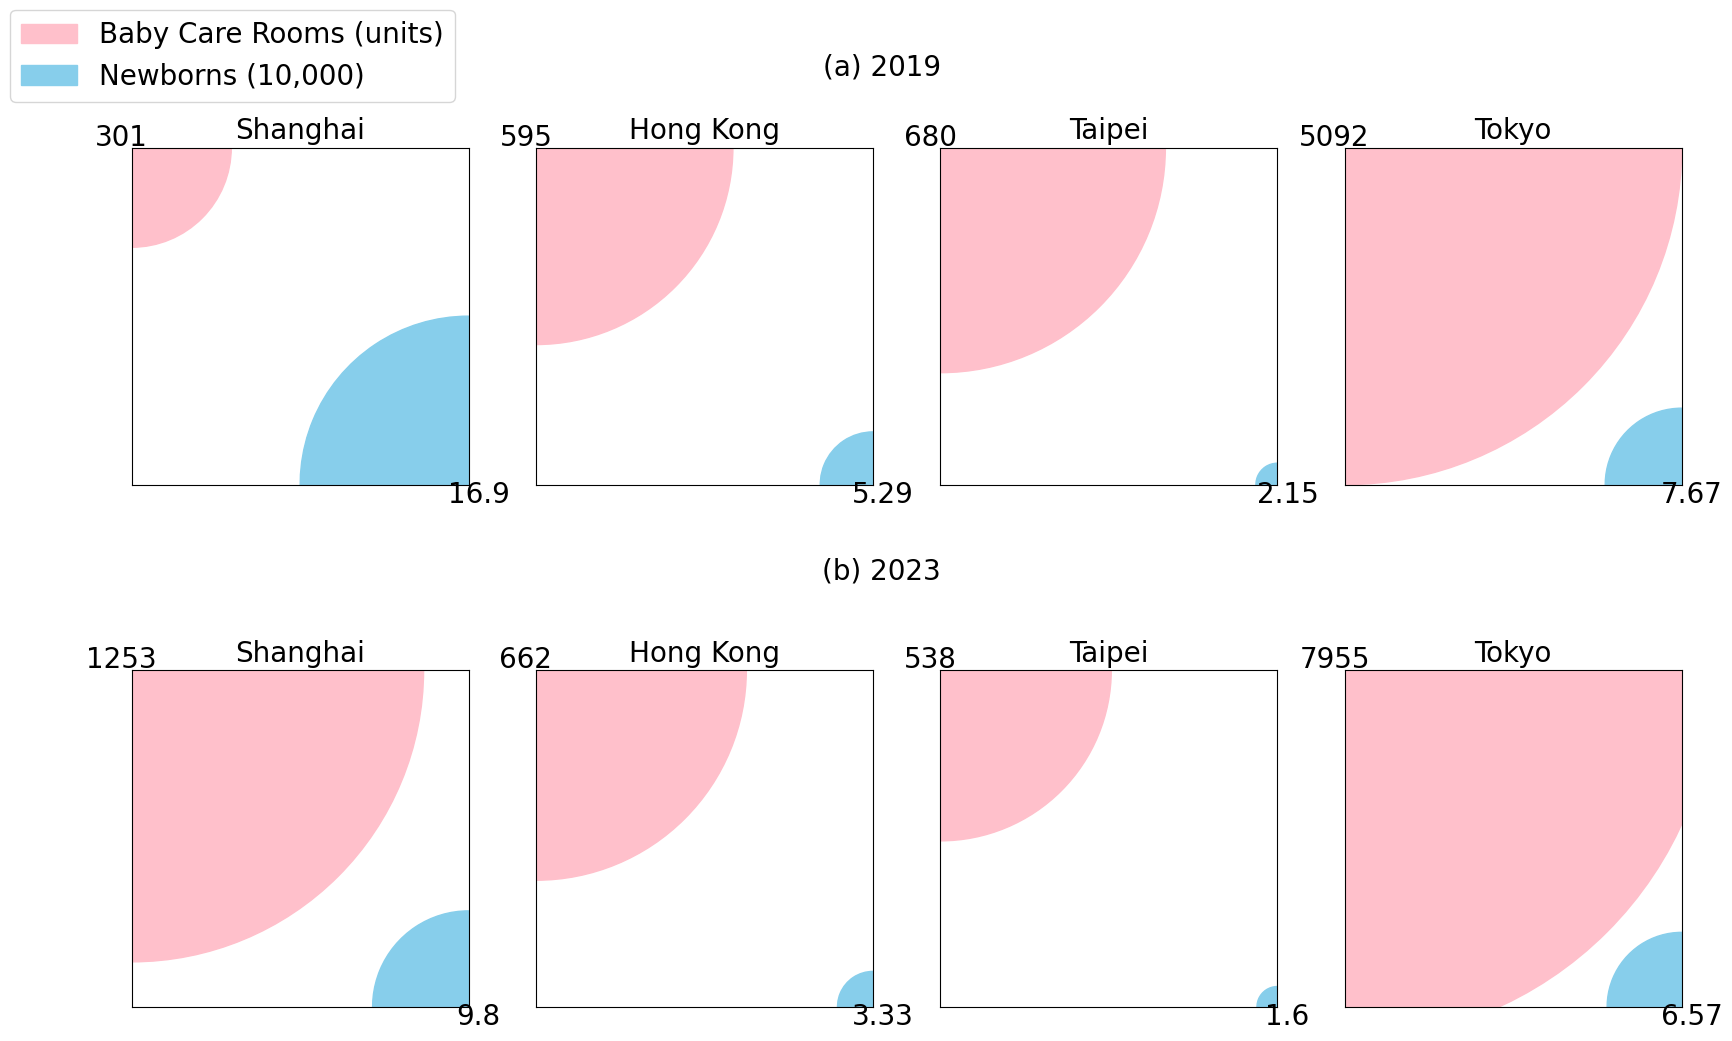

In [11]:
plt.figure(figsize=(20, 12))

max_rooms_2019 = uc['baby_care_rooms_2019'].max()
max_newborns_2019 = uc['newborns_2019_2'].max()
max_rooms_2023 = uc['baby_care_rooms_2023'].max()
max_newborns_2023 = uc['newborns_2023_2'].max()

scale_rooms_2019 = {
    'Shanghai': 10,
    'Hong Kong': 10,
    'Taipei': 10,
    'Tokyo': 2
}
scale_newborns_2019 = {
    'Shanghai': 1,
    'Hong Kong': 1,
    'Taipei': 1,
    'Tokyo': 1
}

scale_rooms_2023 = {
    'Shanghai': 11,
    'Hong Kong': 15,
    'Taipei': 15,
    'Tokyo': 2.2
}
scale_newborns_2023 = {
    'Shanghai': 0.57,
    'Hong Kong': 0.62,
    'Taipei': 0.74,
    'Tokyo': 0.66
}

plt.subplots_adjust(hspace=0.3)  

plt.figtext(0.5, 0.92, '(a) 2019', ha='center', va='center', fontsize=20)
plt.figtext(0.5, 0.50, '(b) 2023', ha='center', va='center', fontsize=20)

for index, row in uc.iterrows():
    ax_2019 = plt.subplot(2, 4, index + 1, aspect='equal')
    
    city = row['city']
    room_scale_2019 = scale_rooms_2019.get(city, 1)
    newborn_scale_2019 = scale_newborns_2019.get(city, 1)
    
    radius_rooms_2019 = 0.5 * (row['baby_care_rooms_2019'] / max_rooms_2019) * room_scale_2019
    radius_newborns_2019 = 0.5 * (row['newborns_2019_2'] / max_newborns_2019) * newborn_scale_2019
    
    wedge1_2019 = Wedge(center=(0, 1), r=radius_rooms_2019, theta1=270, theta2=360, color='pink')
    wedge2_2019 = Wedge(center=(1, 0), r=radius_newborns_2019, theta1=90, theta2=0, color='skyblue')
    
    ax_2019.add_patch(wedge1_2019)
    ax_2019.add_patch(wedge2_2019)
    
    ax_2019.text(-0.03, 1.03, f'{row["baby_care_rooms_2019"]}', color='black', ha='center', va='center', fontsize=20)
    ax_2019.text(1.03, -0.03, f'{row["newborns_2019_2"]}', color='black', ha='center', va='center', fontsize=20)
    
    ax_2019.set_xlim(0, 1)
    ax_2019.set_ylim(0, 1)
    ax_2019.set_xticks([])
    ax_2019.set_yticks([])
    plt.title(f"{city}", fontsize=20)

    ax_2023 = plt.subplot(2, 4, index + 5, aspect='equal')
    
    room_scale_2023 = scale_rooms_2023.get(city, 1)
    newborn_scale_2023 = scale_newborns_2023.get(city, 1)
    
    radius_rooms_2023 = 0.5 * (row['baby_care_rooms_2023'] / max_rooms_2023) * room_scale_2023
    radius_newborns_2023 = 0.5 * (row['newborns_2023_2'] / max_newborns_2023) * newborn_scale_2023
    
    wedge1_2023 = Wedge(center=(0, 1), r=radius_rooms_2023, theta1=270, theta2=360, color='pink')
    wedge2_2023 = Wedge(center=(1, 0), r=radius_newborns_2023, theta1=90, theta2=0, color='skyblue')
    
    ax_2023.add_patch(wedge1_2023)
    ax_2023.add_patch(wedge2_2023)
    
    ax_2023.text(-0.03, 1.03, f'{row["baby_care_rooms_2023"]}', color='black', ha='center', va='center', fontsize=20)
    ax_2023.text(1.03, -0.03, f'{row["newborns_2023_2"]}', color='black', ha='center', va='center', fontsize=20)
    
    ax_2023.set_xlim(0, 1)
    ax_2023.set_ylim(0, 1)
    ax_2023.set_xticks([])
    ax_2023.set_yticks([])
    plt.title(f"{city}", fontsize=20)

pink_patch = Patch(color='pink', label='Baby Care Rooms (units)')
skyblue_patch = Patch(color='skyblue', label='Newborns (10,000)')
plt.legend(handles=[pink_patch, skyblue_patch], loc='upper right', bbox_to_anchor=(-2.6, 3.0), ncol=1, fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.9]) 

plt.savefig('output/figure 4.1.png', dpi=300)

plt.show()

## number of baby care rooms per 1,000 newborns

In [12]:
uc['rooms_per_1000_newborns_2019'] = (uc['baby_care_rooms_2019'] / (uc['newborns_2019_1'] / 1000)).round(2)
uc['rooms_per_1000_newborns_2023'] = (uc['baby_care_rooms_2023'] / (uc['newborns_2023_1'] / 1000)).round(2)

uc.to_csv(uc_path, index=False, encoding='utf-8-sig')

uc.head()

,city,baby_care_rooms_2019,newborns_2019_1,newborns_2019_2,baby_care_rooms_2023,newborns_2023_1,newborns_2023_2,rooms_per_1000_newborns_2019,rooms_per_1000_newborns_2023,rooms_per_10000_newborns_2019,rooms_per_10000_newborns_2023
0,Shanghai,301,169000,16.90,1253,98000,9.80,1.78,12.79,17.81,127.86
1,Hong Kong,595,52856,5.29,662,33288,3.33,11.26,19.89,112.57,198.87
2,Taipei,680,21468,2.15,538,16027,1.60,31.68,33.57,316.75,335.68
3,Tokyo,5092,76725,7.67,7955,65680,6.57,66.37,121.12,663.67,1211.18


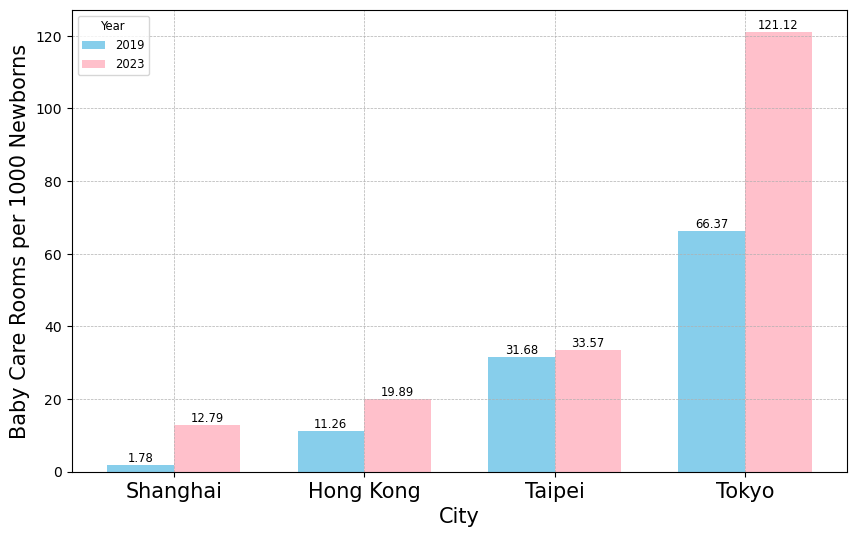

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(uc['city']))

bars_2019 = ax.bar([i - bar_width/2 for i in index], uc['rooms_per_1000_newborns_2019'], width=bar_width, color='skyblue', label='2019')

bars_2023 = ax.bar([i + bar_width/2 for i in index], uc['rooms_per_1000_newborns_2023'], width=bar_width, color='pink', label='2023')

ax.set_xlabel('City', fontsize=15)
ax.set_ylabel('Baby Care Rooms per 1000 Newborns', fontsize=15)
ax.set_xticks(index)
ax.set_xticklabels(uc['city'], fontsize=15)

# 添加图例标题并设置为 "Year"，同时图例字体大小为 small
legend = ax.legend(fontsize='small', title="Year")
legend.get_title().set_fontsize('small')

# 添加网格虚线
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

for bar in bars_2019:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize='small')

for bar in bars_2023:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize='small')

plt.savefig('output/figure 4.2.png', dpi=300)

plt.show()


# classify baby care rooms

## 2019

In [14]:
survey_categories_2019_data = {
    "categories": [
        "Metro Stations",
        "Bus Stations",
        "Leisure and Entertainment Venues",
        "Train/High-speed rail Stations",
        "Culture Venues",
        "Hospitals",
        "Airports",
        "Shopping Malls"
    ],
    "percentage_lack": [85.98, 83.95, 74.52, 70.47, 68.78, 53.27, 40.78, 35.24],
    "percentage_bad": [78.66, 79.65, 71.34, 71.96, 58.81, 47.23, 37.30, 21.59]
}

# 创建 DataFrame
survey_categories_2019 = pd.DataFrame(survey_categories_2019_data)

# 输出 DataFrame
survey_categories_2019.head(15)

,categories,percentage_lack,percentage_bad
0,Metro Stations,85.98,78.66
1,Bus Stations,83.95,79.65
2,Leisure and Entertainment Venues,74.52,71.34
3,Train/High-speed rail Stations,70.47,71.96
4,Culture Venues,68.78,58.81
5,Hospitals,53.27,47.23
6,Airports,40.78,37.30
7,Shopping Malls,35.24,21.59


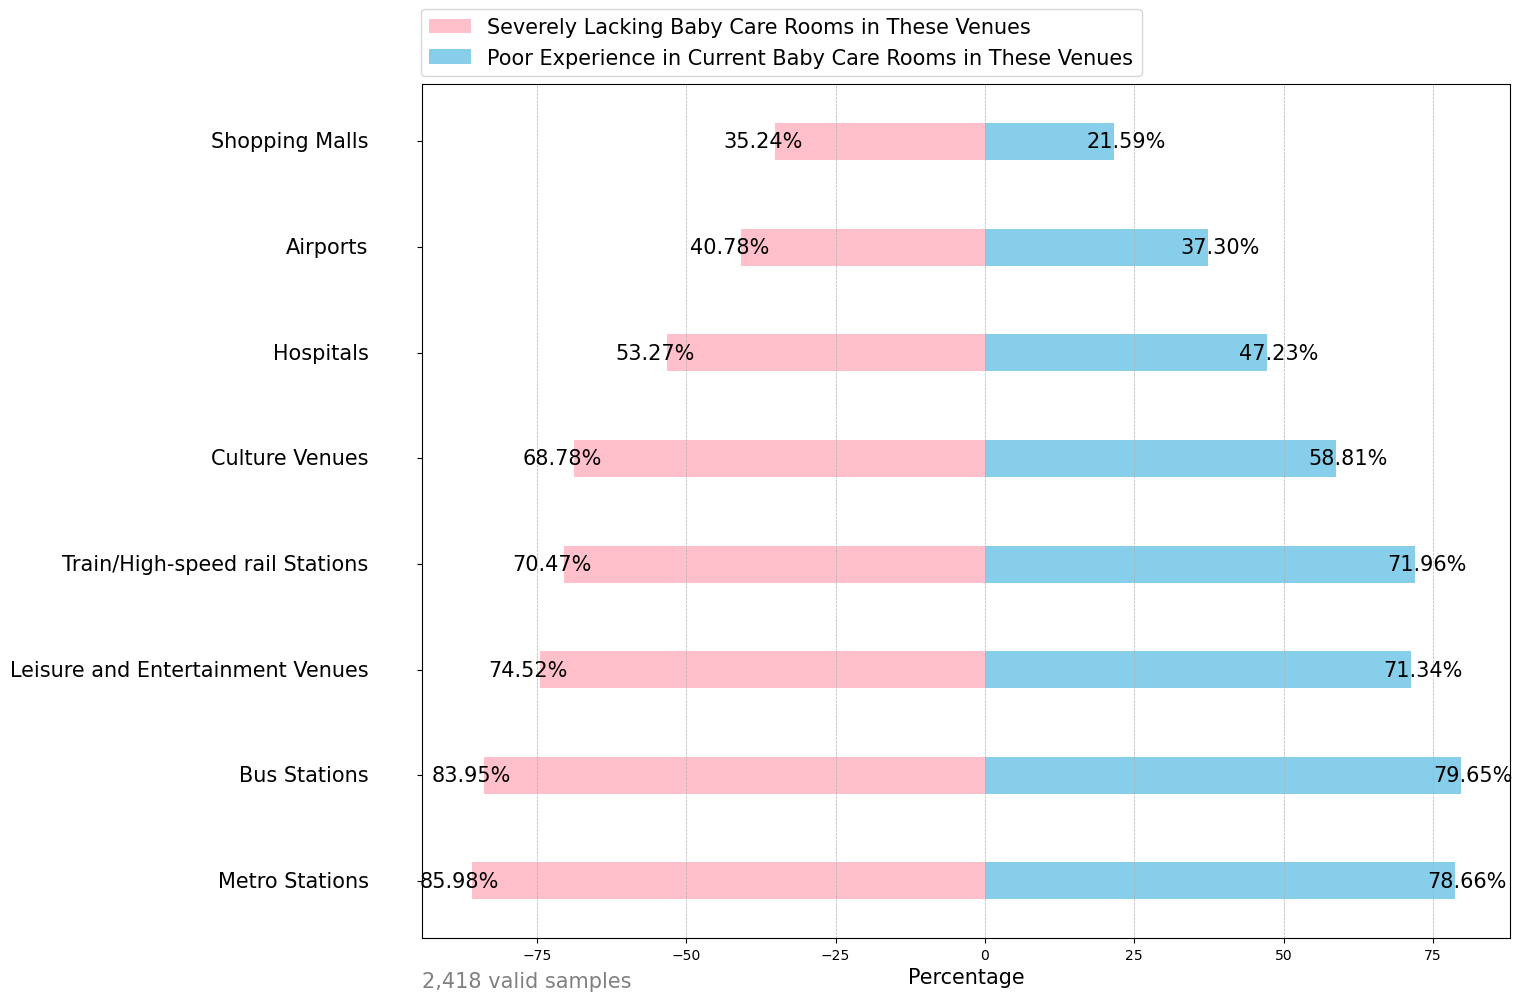

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

categories = survey_categories_2019['categories']
bar_width = 0.35
index = range(len(categories))

bars1 = plt.barh(index, [-p for p in survey_categories_2019['percentage_lack']], bar_width, label='Severely Lacking Baby Care Rooms in These Venues', color='pink')
bars2 = plt.barh([i for i in index], survey_categories_2019['percentage_bad'], bar_width, label='Poor Experience in Current Baby Care Rooms in These Venues', color='skyblue')

for bar in bars1:
    width = bar.get_width()
    plt.text(bar.get_x() + width - 2, bar.get_y() + bar.get_height() / 2, f'{-width:.2f}%', ha='center', va='center', color='black', fontsize=15)

for bar in bars2:
    width = bar.get_width()
    plt.text(bar.get_x() + width + 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='center', va='center', color='black', fontsize=15)

plt.xlabel('Percentage', fontsize=15)

plt.yticks(index, categories, ha='right', va='center', fontsize=15)
ax = plt.gca()
ax.get_yaxis().set_tick_params(pad=35)  # 增加从轴到文本的距离

# 添加网格辅助线
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)

plt.legend(loc='upper center', bbox_to_anchor=(0.33, 1.1), ncol=1, fontsize=15)

plt.text(0.00, -0.05, '2,418 valid samples', ha='left', va='center', color='gray', fontsize=15, transform=ax.transAxes)

plt.tight_layout(rect=[0.15, 0, 1, 1])

plt.savefig('output/figure 4.3.png', dpi=300)

plt.show()


In [16]:
categories = ['Shopping Malls', 'Airports', 'Hospitals', 'Leisure and Entertainment Venues', 
          'Cultural Venues', 'Bus Stations', 'Metro Stations', 'Train/High-speed Rail Stations', 'Others']
percentage = [76.74, 20.93, 0.66, 0.33, 0, 0, 0, 0, 1.33]
total_rooms_2019 = 301

counts = [round(total_rooms_2019 * percentage / 100) for percentage in percentage]

bcr_c_2019 = pd.DataFrame({
    'categories': categories,
    'percentage': percentage,
    'counts': counts
})

bcr_c_2019.head(10)

,categories,percentage,counts
0,Shopping Malls,76.74,231
1,Airports,20.93,63
2,Hospitals,0.66,2
3,Leisure and Entertainment Venues,0.33,1
4,Cultural Venues,0.00,0
5,Bus Stations,0.00,0
6,Metro Stations,0.00,0
7,Train/High-speed Rail Stations,0.00,0
8,Others,1.33,4


/tmp/ipykernel_802/3259735723.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(wrapped_categories, fontsize=15)


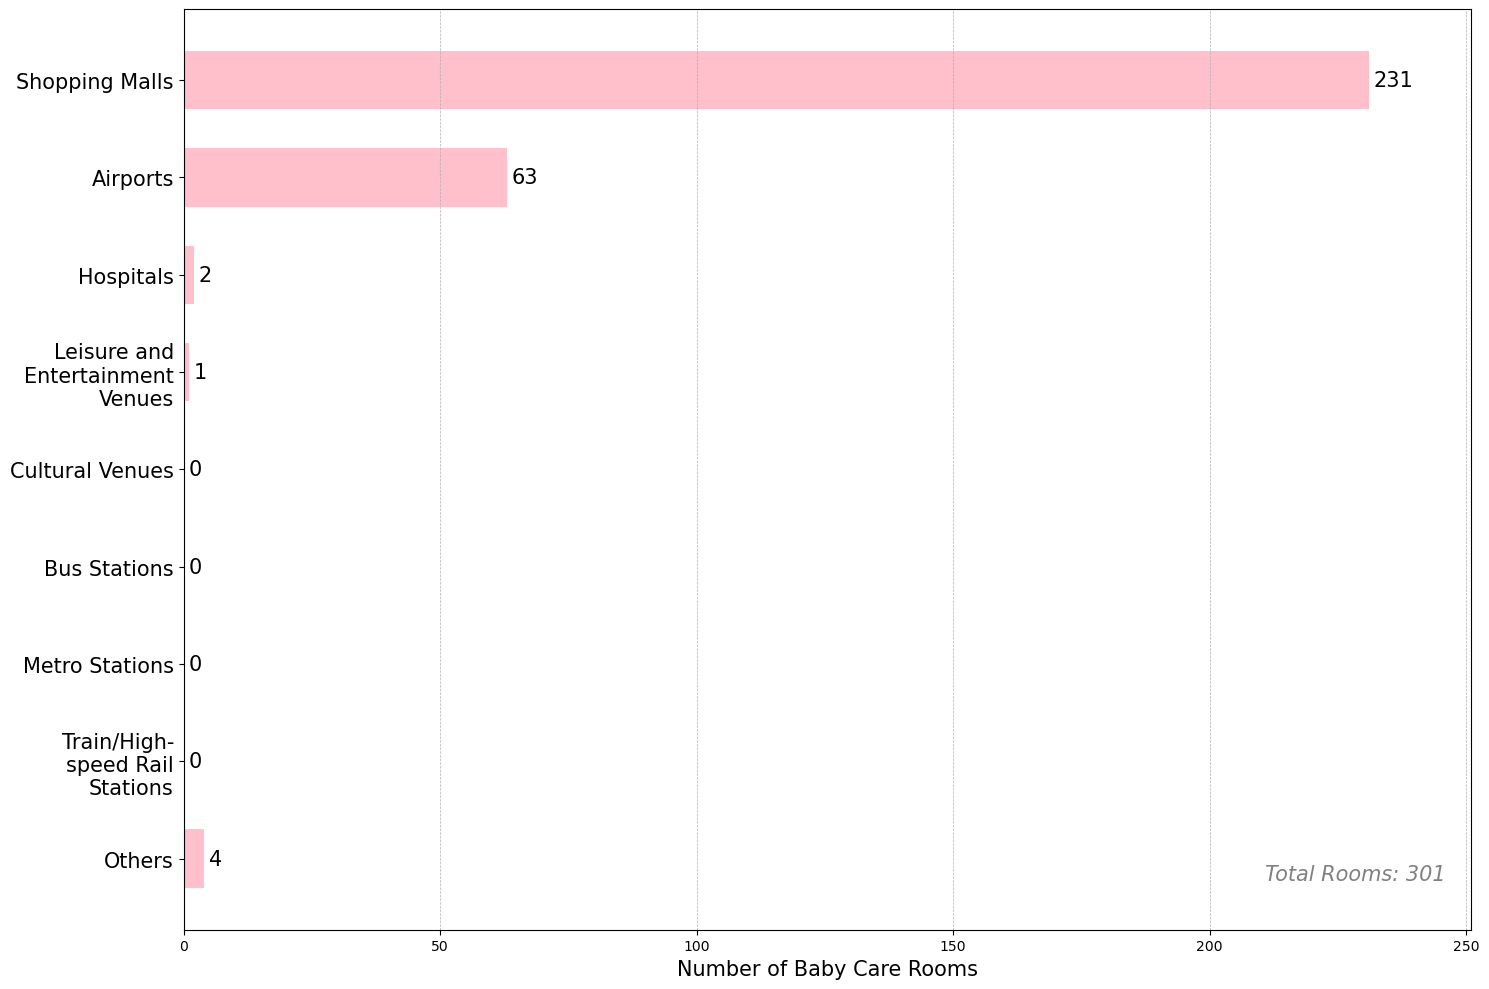

In [17]:
def wrap_labels(labels, width=15):
    return [textwrap.fill(label, width) for label in labels]

categories = bcr_c_2019['categories'][::-1]
counts = bcr_c_2019['counts'][::-1]
total_rooms_2019 = sum(counts)

wrapped_categories = wrap_labels(categories)

fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.barh(wrapped_categories, counts, color='pink', height=0.6)

for bar, count in zip(bars, counts):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{count}',
            va='center', ha='left', color='black', fontsize=15)

ax.set_xlabel('Number of Baby Care Rooms', fontsize=15)
ax.set_xlim(0, max(counts) + 20)

ax.set_yticklabels(wrapped_categories, fontsize=15)

ax.text(0.98, 0.05, f'Total Rooms: {total_rooms_2019}', transform=ax.transAxes, ha='right',
        va='bottom', fontsize=15, color='grey', style='italic')

ax.grid(True, axis='x', linestyle='--', linewidth=0.5)

plt.tight_layout()

plt.savefig('output/figure 4.4.png', dpi=300)
plt.show()

## 2023

### shopping malls

In [18]:
def parse_date(date_str):
    try:
        if '-' in date_str:
            return int(date_str.split('-')[0])
        return int(date_str)
    except ValueError:
        return None

bcr_2023['parsed_date'] = bcr_2023['date'].apply(parse_date)

shopping_malls_2023 = bcr_2023[
    (((bcr_2023['parsed_date'] >= 1) & (bcr_2023['parsed_date'] <= 7)) & 
    (bcr_2023['time'] >= '10:00') & (bcr_2023['time'] <= '22:00')) |
    (bcr_2023['name'].isin(['高岛屋百货妈咪小屋', '红星美凯龙金桥商场', '新世界大丸百货“爱心港湾”妈咪小屋',
                            '上海苏宁易购销售有限公司崇明八一路店', '新大陆广场', '唐镇阳光天地城',
                            '上海新梅联合广场', '世博源', '上海宜家家居北蔡店',
                            '上海南汇浦东商场有限公司', '浦东嘉里城', '上海奕欧来奥特莱斯',
                            '东明商业广场爱心妈咪小屋', '上海中心', '上海国美电器有限公司崇明店']))
]


from pypinyin import lazy_pinyin, Style

shopping_malls_2023['name_pinyin'] = shopping_malls_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
shopping_malls_2023 = shopping_malls_2023.sort_values(by='name_pinyin')

shopping_malls_2023 = shopping_malls_2023.drop(columns=['name_pinyin'])

residue_1 = bcr_2023[~bcr_2023.index.isin(shopping_malls_2023.index)]

shopping_malls_2023 = shopping_malls_2023.drop(columns=['parsed_date'])
residue_1 = residue_1.drop(columns=['parsed_date'])

shopping_malls_2023.to_csv('Output/shopping_malls_2023.csv', index=False, encoding='utf-8-sig')
residue_1.to_csv('Output/residue_1.csv', index=False, encoding='utf-8-sig')

print("shopping_malls_2023.csv saved to: Output/shopping_malls_2023.csv")
print("residue_1.csv saved to: Output/residue_1.csv")

shopping_malls_2023.csv saved to: Output/shopping_malls_2023.csv
residue_1.csv saved to: Output/residue_1.csv


/tmp/ipykernel_802/126783421.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_malls_2023['name_pinyin'] = shopping_malls_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


### hospitals

In [19]:
keywords = ["医院", "卫生服务中心", "口腔", "牙", "诊所", "门诊", "护理院", "妇幼", "中医", "卫生中心", "保健", "临床", "医疗"]

hospitals_2023 = residue_1[residue_1['name'].apply(lambda x: any(keyword in x for keyword in keywords))]

additional_names = [
    "爱馨妈咪小屋", "宝山区妇女儿童发展中心妈咪小屋", "宝山区东方假日田园", "儿童医学中心",
    "华亭镇社区卫生服务分中心", "嘉会爱心妈咪小屋", "南桥镇光明社区服务中心", "上海国际医学中心",
    "松江区石湖荡镇社区卫生服务塔汇分中心", "胡桥社区服务中心",
    "南桥镇光明社区服务中心", "上海国际医学中心", "西渡社区服务中心", "杨浦区疾病预防控制中心", "岳医华氏天成",  "瑞慈爱心妈咪小屋"
]

additional_hospitals = residue_1[residue_1['name'].isin(additional_names)]

hospitals_2023 = pd.concat([hospitals_2023, additional_hospitals]).drop_duplicates()


hospitals_2023['name_pinyin'] = hospitals_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
hospitals_2023 = hospitals_2023.sort_values(by='name_pinyin')

hospitals_2023 = hospitals_2023.drop(columns=['name_pinyin'])

hospitals_2023.to_csv('Output/hospitals_2023.csv', index=False, encoding='utf-8-sig')
print("hospitals_2023.csv saved to: Output/hospitals_2023.csv")

residue_2 = residue_1[~residue_1.index.isin(hospitals_2023.index)]

residue_2['name_pinyin'] = residue_2['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))

residue_2 = residue_2.sort_values(by='name_pinyin')

residue_2 = residue_2.drop(columns=['name_pinyin'])

residue_2.to_csv('Output/residue_2.csv', index=False, encoding='utf-8-sig')
print("residue_2.csv saved to: Output/residue_2.csv")

/tmp/ipykernel_802/2334292071.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_2['name_pinyin'] = residue_2['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


hospitals_2023.csv saved to: Output/hospitals_2023.csv
residue_2.csv saved to: Output/residue_2.csv


### airports

In [20]:
airports_2023 = residue_2[residue_2['name'].str.contains("机场")]

additional_airport = residue_2[residue_2['name'] == "虹桥T2航站楼A岛母婴室"]
airports_2023 = pd.concat([airports_2023, additional_airport]).drop_duplicates()

airports_2023['name_pinyin'] = airports_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
airports_2023 = airports_2023.sort_values(by='name_pinyin')

airports_2023 = airports_2023.drop(columns=['name_pinyin'])

airports_2023.to_csv('Output/airports_2023.csv', index=False, encoding='utf-8-sig')
print("airports_2023.csv saved to: Output/airports_2023.csv")

residue_3 = residue_2[~residue_2.index.isin(airports_2023.index)]

residue_3['name_pinyin'] = residue_3['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_3 = residue_3.sort_values(by='name_pinyin')

residue_3 = residue_3.drop(columns=['name_pinyin'])

residue_3.to_csv('Output/residue_3.csv', index=False, encoding='utf-8-sig')
print("residue_3.csv saved to: Output/residue_3.csv")

airports_2023.csv saved to: Output/airports_2023.csv
residue_3.csv saved to: Output/residue_3.csv


/tmp/ipykernel_802/3313287541.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_3['name_pinyin'] = residue_3['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


### bus stations

In [21]:
keywords = ["公交", "交运", "巴士", "长途汽车", "长途客运"]

bus_stations_2023 = residue_3[residue_3['name'].apply(lambda x: any(keyword in x for keyword in keywords))]

bus_stations_2023['name_pinyin'] = bus_stations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
bus_stations_2023 = bus_stations_2023.sort_values(by='name_pinyin')

bus_stations_2023 = bus_stations_2023.drop(columns=['name_pinyin'])

bus_stations_2023.to_csv('Output/bus_stations_2023.csv', index=False, encoding='utf-8-sig')
print("bus_stations_2023.csv saved to: Output/bus_stations_2023.csv")

residue_4 = residue_3[~residue_3.index.isin(bus_stations_2023.index)]

residue_4['name_pinyin'] = residue_4['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_4 = residue_4.sort_values(by='name_pinyin')

residue_4 = residue_4.drop(columns=['name_pinyin'])

residue_4.to_csv('Output/residue_4.csv', index=False, encoding='utf-8-sig')
print("residue_4.csv saved to: Output/residue_4.csv")

bus_stations_2023.csv saved to: Output/bus_stations_2023.csv
residue_4.csv saved to: Output/residue_4.csv


/tmp/ipykernel_802/3612897191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_stations_2023['name_pinyin'] = bus_stations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
/tmp/ipykernel_802/3612897191.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_4['name_pinyin'] = residue_4['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


### train/high-speed rail stations

In [22]:
keywords = ["铁路", "火车"]

train_or_high_speed_rail_stations_2023 = residue_4[residue_4['name'].apply(lambda x: any(keyword in x for keyword in keywords))]

train_or_high_speed_rail_stations_2023['name_pinyin'] = train_or_high_speed_rail_stations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
train_or_high_speed_rail_stations_2023 = train_or_high_speed_rail_stations_2023.sort_values(by='name_pinyin')

train_or_high_speed_rail_stations_2023 = train_or_high_speed_rail_stations_2023.drop(columns=['name_pinyin'])

train_or_high_speed_rail_stations_2023.to_csv('Output/train_or_high_speed_rail_stations_2023.csv', index=False, encoding='utf-8-sig')
print("train_or_high_speed_rail_stations_2023.csv saved to: Output/train_or_high_speed_rail_stations_2023.csv")

residue_5 = residue_4[~residue_4.index.isin(train_or_high_speed_rail_stations_2023.index)]

residue_5['name_pinyin'] = residue_5['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_5 = residue_5.sort_values(by='name_pinyin')

residue_5 = residue_5.drop(columns=['name_pinyin'])

residue_5.to_csv('Output/residue_5.csv', index=False, encoding='utf-8-sig')
print("residue_5.csv saved to: Output/residue_5.csv")

/tmp/ipykernel_802/196867919.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_or_high_speed_rail_stations_2023['name_pinyin'] = train_or_high_speed_rail_stations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


train_or_high_speed_rail_stations_2023.csv saved to: Output/train_or_high_speed_rail_stations_2023.csv
residue_5.csv saved to: Output/residue_5.csv


/tmp/ipykernel_802/196867919.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_5['name_pinyin'] = residue_5['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


### metro stations

In [23]:
station_names = ["儿童医学中心站", "上海动物园站", "徐家汇站", "爱心妈咪小屋"]

metro_stations_2023 = residue_5[residue_5['name'].isin(station_names)]

metro_stations_2023['name_pinyin'] = metro_stations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
metro_stations_2023 = metro_stations_2023.sort_values(by='name_pinyin')

metro_stations_2023 = metro_stations_2023.drop(columns=['name_pinyin'])

metro_stations_2023.to_csv('Output/metro_stations_2023.csv', index=False, encoding='utf-8-sig')
print("metro_stations_2023.csv saved to: Output/metro_stations_2023.csv")

residue_6 = residue_5[~residue_5.index.isin(metro_stations_2023.index)]

residue_6['name_pinyin'] = residue_6['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_6 = residue_6.sort_values(by='name_pinyin')

residue_6 = residue_6.drop(columns=['name_pinyin'])

residue_6.to_csv('Output/residue_6.csv', index=False, encoding='utf-8-sig')
print("residue_6.csv saved to: Output/residue_6.csv")

/tmp/ipykernel_802/3255723399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro_stations_2023['name_pinyin'] = metro_stations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
/tmp/ipykernel_802/3255723399.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_6['name_pinyin'] = residue_6['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


metro_stations_2023.csv saved to: Output/metro_stations_2023.csv
residue_6.csv saved to: Output/residue_6.csv


### ferry stations

In [24]:
ferry_station_name = "崇明客轮公司南门客运站"

ferry_stations_2023 = residue_6[residue_6['name'] == ferry_station_name]

ferry_stations_2023['name_pinyin'] = ferry_stations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
ferry_stations_2023 = ferry_stations_2023.sort_values(by='name_pinyin')

ferry_stations_2023 = ferry_stations_2023.drop(columns=['name_pinyin'])

ferry_stations_2023.to_csv('Output/ferry_stations_2023.csv', index=False, encoding='utf-8-sig')
print("ferry_stations_2023.csv saved to: Output/ferry_stations_2023.csv")

residue_7 = residue_6[~residue_6.index.isin(ferry_stations_2023.index)]

residue_7['name_pinyin'] = residue_7['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_7 = residue_7.sort_values(by='name_pinyin')

residue_7 = residue_7.drop(columns=['name_pinyin'])

residue_7.to_csv('Output/residue_7.csv', index=False, encoding='utf-8-sig')
print("residue_7.csv saved to: Output/residue_7.csv")

/tmp/ipykernel_802/3191835163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferry_stations_2023['name_pinyin'] = ferry_stations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


ferry_stations_2023.csv saved to: Output/ferry_stations_2023.csv
residue_7.csv saved to: Output/residue_7.csv


/tmp/ipykernel_802/3191835163.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_7['name_pinyin'] = residue_7['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


### highway service areas

In [25]:
highway_service_areas_2023 = residue_7[residue_7['name'].str.contains("服务区")]

highway_service_areas_2023['name_pinyin'] = highway_service_areas_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
highway_service_areas_2023 = highway_service_areas_2023.sort_values(by='name_pinyin')

highway_service_areas_2023 = highway_service_areas_2023.drop(columns=['name_pinyin'])

highway_service_areas_2023.to_csv('Output/highway_service_areas_2023.csv', index=False, encoding='utf-8-sig')
print("highway_service_areas_2023.csv saved to: Output/highway_service_areas_2023.csv")

residue_8 = residue_7[~residue_7.index.isin(highway_service_areas_2023.index)]

residue_8['name_pinyin'] = residue_8['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_8 = residue_8.sort_values(by='name_pinyin')

residue_8 = residue_8.drop(columns=['name_pinyin'])

residue_8.to_csv('Output/residue_8.csv', index=False, encoding='utf-8-sig')
print("residue_8.csv saved to: Output/residue_8.csv")

/tmp/ipykernel_802/3798449643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highway_service_areas_2023['name_pinyin'] = highway_service_areas_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


highway_service_areas_2023.csv saved to: Output/highway_service_areas_2023.csv


/tmp/ipykernel_802/3798449643.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_8['name_pinyin'] = residue_8['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


residue_8.csv saved to: Output/residue_8.csv


### leisure and entertainment venues

In [26]:
leisure_and_entertainment_venues_2023 = residue_8[
    residue_8['name'].str.contains("公园|欢乐")
]

additional_names = [
    "八一广场",
    "花米庄行爱心妈咪小屋",
    "上海兰馨影业有限公司爱心妈咪小屋",
    "陆家嘴中心绿地爱心妈咪小屋",
    "爱的港湾爱心妈咪小屋"
]
additional_leisure_venues = residue_8[residue_8['name'].isin(additional_names)]
leisure_and_entertainment_venues_2023 = pd.concat([leisure_and_entertainment_venues_2023, additional_leisure_venues]).drop_duplicates()

leisure_and_entertainment_venues_2023['name_pinyin'] = leisure_and_entertainment_venues_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
leisure_and_entertainment_venues_2023 = leisure_and_entertainment_venues_2023.sort_values(by='name_pinyin')

leisure_and_entertainment_venues_2023 = leisure_and_entertainment_venues_2023.drop(columns=['name_pinyin'])

leisure_and_entertainment_venues_2023.to_csv('Output/leisure_and_entertainment_venues_2023.csv', index=False, encoding='utf-8-sig')
print("leisure_and_entertainment_venues_2023.csv saved to: Output/leisure_and_entertainment_venues_2023.csv")

residue_9 = residue_8[~residue_8.index.isin(leisure_and_entertainment_venues_2023.index)]

residue_9['name_pinyin'] = residue_9['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_9 = residue_9.sort_values(by='name_pinyin')

residue_9 = residue_9.drop(columns=['name_pinyin'])

residue_9.to_csv('Output/residue_9.csv', index=False, encoding='utf-8-sig')
print("residue_9.csv saved to: Output/residue_9.csv")

/tmp/ipykernel_802/3610786834.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_9['name_pinyin'] = residue_9['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


leisure_and_entertainment_venues_2023.csv saved to: Output/leisure_and_entertainment_venues_2023.csv
residue_9.csv saved to: Output/residue_9.csv


### cultural venues

In [27]:
keywords = ["博物馆", "植物园", "动物园", "科技馆", "电视塔"]
cultural_venues_2023 = residue_9[
    residue_9['name'].str.contains("|".join(keywords))
]

additional_names = [
    "古猗园爱心妈咪小屋",
    "海贝贝爱心妈咪小屋",
    "上海环球金融中心观光厅"
]
additional_cultural_venues = residue_9[residue_9['name'].isin(additional_names)]
cultural_venues_2023 = pd.concat([cultural_venues_2023, additional_cultural_venues]).drop_duplicates()

cultural_venues_2023['name_pinyin'] = cultural_venues_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
cultural_venues_2023 = cultural_venues_2023.sort_values(by='name_pinyin')

cultural_venues_2023 = cultural_venues_2023.drop(columns=['name_pinyin'])

cultural_venues_2023.to_csv('Output/cultural_venues_2023.csv', index=False, encoding='utf-8-sig')
print("cultural_venues_2023.csv saved to: Output/cultural_venues_2023.csv")

residue_10 = residue_9[~residue_9.index.isin(cultural_venues_2023.index)]

residue_10['name_pinyin'] = residue_10['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_10 = residue_10.sort_values(by='name_pinyin')

residue_10 = residue_10.drop(columns=['name_pinyin'])

residue_10.to_csv('Output/residue_10.csv', index=False, encoding='utf-8-sig')
print("residue_10.csv saved to: Output/residue_10.csv")

cultural_venues_2023.csv saved to: Output/cultural_venues_2023.csv


/tmp/ipykernel_802/2990245245.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_10['name_pinyin'] = residue_10['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


residue_10.csv saved to: Output/residue_10.csv


### others_toilets

In [28]:
others_toilets_2023 = residue_10[residue_10['name'].str.contains("区管公厕")]

others_toilets_2023['name_pinyin'] = others_toilets_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
others_toilets_2023 = others_toilets_2023.sort_values(by='name_pinyin')

others_toilets_2023 = others_toilets_2023.drop(columns=['name_pinyin'])

others_toilets_2023.to_csv('Output/others_toilets_2023.csv', index=False, encoding='utf-8-sig')
print("others_toilets_2023.csv saved to: Output/others_toilets_2023.csv")

residue_11 = residue_10[~residue_10.index.isin(others_toilets_2023.index)]

residue_11['name_pinyin'] = residue_11['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_11 = residue_11.sort_values(by='name_pinyin')

residue_11 = residue_11.drop(columns=['name_pinyin'])

residue_11.to_csv('Output/residue_11.csv', index=False, encoding='utf-8-sig')
print("residue_11.csv saved to: Output/residue_11.csv")

others_toilets_2023.csv saved to: Output/others_toilets_2023.csv
residue_11.csv saved to: Output/residue_11.csv


/tmp/ipykernel_802/3396459689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_toilets_2023['name_pinyin'] = others_toilets_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
/tmp/ipykernel_802/3396459689.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_11['name_pinyin'] = residue_11['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


### others_work_places

In [29]:
specified_names_updated = [
    "M50爱心妈咪小屋", "爱丁妈咪小屋", "东方海外大厦妈咪小屋", "大宁德必易园爱心妈咪小屋",
    "冠生园园区爱心妈咪小屋", "华侨大厦爱心妈咪小屋", "金钟广场妈咪小屋", "南京西路支行妈咪小屋",
    "市北高新园区爱心妈咪小屋", "上海窗钩传媒文化园爱心妈咪小屋", "上海双创产业园爱心妈咪小屋",
    "上海中心大厦爱心妈咪小屋", "万荣园区妈咪小屋",
    "新场工业区职工服务站", "幸福驿站爱心妈咪小屋", "幸福益站妈咪小屋", "智慧广场妈咪小屋", "曹路工业园区服务中心"
]

others_work_places_2023 = residue_11[residue_11['name'].isin(specified_names_updated)]

others_work_places_2023['name_pinyin'] = others_work_places_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
others_work_places_2023 = others_work_places_2023.sort_values(by='name_pinyin')

others_work_places_2023 = others_work_places_2023.drop(columns=['name_pinyin'])

others_work_places_2023.to_csv('Output/others_work_places_2023.csv', index=False, encoding='utf-8-sig')
print("Updated others_work_places_2023.csv saved to: Output/others_work_places_2023.csv")

residue_12 = residue_11[~residue_11.index.isin(others_work_places_2023.index)]

residue_12['name_pinyin'] = residue_12['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_12 = residue_12.sort_values(by='name_pinyin')

residue_12 = residue_12.drop(columns=['name_pinyin'])

residue_12.to_csv('Output/residue_12.csv', index=False, encoding='utf-8-sig')
print("Updated residue_12.csv saved to: Output/residue_12.csv")

Updated others_work_places_2023.csv saved to: Output/others_work_places_2023.csv
Updated residue_12.csv saved to: Output/residue_12.csv


/tmp/ipykernel_802/2231645871.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_work_places_2023['name_pinyin'] = others_work_places_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
/tmp/ipykernel_802/2231645871.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_12['name_pinyin'] = residue_12['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


### others grassroots service or governance organizations

In [30]:
specified_names = [
    "白领驿家凯旋门党建服务站", "白领中心妈咪小屋", "大场镇爱心妈咪小屋", "东泰林路爱心妈咪小屋",
    "大团镇总工会", "大团镇总工会爱心妈咪小屋", "奉城镇奉馨妈咪小屋", "枫泾镇总工会爱心妈咪小屋",
    "黄浦滨江党建（群团）服务站妈咪小屋", "江南制造园区群团服务站妈咪小屋", "临港物业工会爱心妈咪小屋",
    "陆家嘴社区党建服务中心爱心妈咪小屋", "马桥镇华银坊爱心妈咪小屋", "马桥镇金星村爱心妈咪小屋",
    "马桥镇彭渡爱心妈咪小屋", "马桥镇旗忠村爱心妈咪小屋", "南汇新城镇社区党建服务中心工会爱心妈咪小屋",
    "南门居民区企业联合工会爱心妈咪小屋", "浦东新区书院镇文化中心爱心妈咪小屋", "七宝老街群团基层服务站爱心妈咪小屋",
    "青村镇家中心爱心妈咪小屋", "石二街道党建服务中心爱心妈咪小屋", "石二街道社区事务受理中心爱心妈咪小屋",
    "上海市崇明区陈家镇社区事务受理服务中心", "上海市崇明区城桥镇社区事务受理服务中心", "万祥镇社区生活服务中心爱心妈咪小屋",
    "新场镇社区事务受理中心爱心妈咪小屋", "西渡街道妈咪小屋", "鑫港湾美丽宝妈小屋", "新虹街道爱心妈咪小屋",
    "新建路妈咪小屋", "行政服务中心爱心妈咪小屋", "行政服务中心爱心妈咪小屋", "元峰苑基层服务站妈咪小屋",
    "友好村爱心妈咪小屋", "周浦镇瑞阳苑居委会爱心妈咪小屋", "张堰镇留溪爱心妈咪小屋"

]

others_grassroots_service_or_governance_organizations_2023 = residue_12[residue_12['name'].isin(specified_names)]

others_grassroots_service_or_governance_organizations_2023['name_pinyin'] = others_grassroots_service_or_governance_organizations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
others_grassroots_service_or_governance_organizations_2023 = others_grassroots_service_or_governance_organizations_2023.sort_values(by='name_pinyin')

others_grassroots_service_or_governance_organizations_2023 = others_grassroots_service_or_governance_organizations_2023.drop(columns=['name_pinyin'])

others_grassroots_service_or_governance_organizations_2023.to_csv('Output/others_grassroots_service_or_governance_organizations_2023.csv', index=False, encoding='utf-8-sig')
print("others_grassroots_service_or_governance_organizations_2023.csv saved to: Output/others_grassroots_service_or_governance_organizations_2023.csv")

residue_13 = residue_12[~residue_12.index.isin(others_grassroots_service_or_governance_organizations_2023.index)]

residue_13['name_pinyin'] = residue_13['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))
residue_13 = residue_13.sort_values(by='name_pinyin')

residue_13 = residue_13.drop(columns=['name_pinyin'])

residue_13.to_csv('Output/residue_13.csv', index=False, encoding='utf-8-sig')
print("residue_13.csv saved to: Output/residue_13.csv")

/tmp/ipykernel_802/1146140324.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_grassroots_service_or_governance_organizations_2023['name_pinyin'] = others_grassroots_service_or_governance_organizations_2023['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


others_grassroots_service_or_governance_organizations_2023.csv saved to: Output/others_grassroots_service_or_governance_organizations_2023.csv
residue_13.csv saved to: Output/residue_13.csv


/tmp/ipykernel_802/1146140324.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue_13['name_pinyin'] = residue_13['name'].apply(lambda x: ''.join(lazy_pinyin(x, style=Style.FIRST_LETTER)))


In [31]:
dataframes = {
    'Shopping Malls': shopping_malls_2023,
    'Hospitals': hospitals_2023,
    'Airports': airports_2023,
    'Bus Stations': bus_stations_2023,
    'Train or High-speed Rail Stations': train_or_high_speed_rail_stations_2023,
    'Metro Stations': metro_stations_2023,
    'Ferry Stations': ferry_stations_2023,
    'Highway Service Areas': highway_service_areas_2023,
    'Leisure and Entertainment Venues': leisure_and_entertainment_venues_2023,
    'Cultural Venues': cultural_venues_2023,
    'Others Toilets': others_toilets_2023,
    'Others Work Places': others_work_places_2023,
    'Others Grassroots Administration Venues': others_grassroots_service_or_governance_organizations_2023,
    'Others Unclear': residue_13
}

counts = {category: df.shape[0] for category, df in dataframes.items()}

total_rooms_2023 = sum(counts.values())

percentages = {category: (count / total_rooms_2023) * 100 for category, count in counts.items()}

bcr_c_2023 = pd.DataFrame({
    'categories': list(counts.keys()),
    'counts': list(counts.values()),
    'percentage': list(percentages.values())
})

bcr_c_2023.head(20)

,categories,counts,percentage
0,Shopping Malls,455,36.341853
1,Hospitals,459,36.661342
2,Airports,120,9.584665
3,Bus Stations,25,1.996805
4,Train or High-speed Rail Stations,3,0.239617
5,Metro Stations,4,0.319489
6,Ferry Stations,1,0.079872
7,Highway Service Areas,4,0.319489
8,Leisure and Entertainment Venues,19,1.517572
9,Cultural Venues,23,1.837061


In [32]:
dataframes = {
    'Shopping Malls': shopping_malls_2023,
    'Hospitals': hospitals_2023,
    'Airports': airports_2023,
    'Bus Stations': bus_stations_2023,
    'Train/High-speed Rail Stations': train_or_high_speed_rail_stations_2023,
    'Metro Stations': metro_stations_2023,
    'Ferry Stations': ferry_stations_2023,
    'Highway Service Areas': highway_service_areas_2023,
    'Leisure and Entertainment Venues': leisure_and_entertainment_venues_2023,
    'Cultural Venues': cultural_venues_2023,
    'Others Toilets': others_toilets_2023,
    'Others Work places': others_work_places_2023,
    'Others Grassroots Administration Venues': others_grassroots_service_or_governance_organizations_2023,
    'Others Unclear': residue_13
}

counts = {category: df.shape[0] for category, df in dataframes.items()}

others_total = (
    counts['Others Toilets'] +
    counts['Others Work places'] +
    counts['Others Grassroots Administration Venues'] +
    counts['Others Unclear']
)

for key in ['Others Toilets', 'Others Work places', 'Others Grassroots Administration Venues', 'Others Unclear']:
    del counts[key]

counts['Others'] = others_total

total_rooms_2023 = sum(counts.values())

percentages = {category: round((count / total_rooms_2023) * 100, 2) for category, count in counts.items()}

bcr_c_2023 = pd.DataFrame({
    'categories': list(counts.keys()),
    'counts': list(counts.values()),
    'percentage': list(percentages.values())
})

bcr_c_2023.head(20)

,categories,counts,percentage
0,Shopping Malls,455,36.34
1,Hospitals,459,36.66
2,Airports,120,9.58
3,Bus Stations,25,2.00
4,Train/High-speed Rail Stations,3,0.24
5,Metro Stations,4,0.32
6,Ferry Stations,1,0.08
7,Highway Service Areas,4,0.32
8,Leisure and Entertainment Venues,19,1.52
9,Cultural Venues,23,1.84


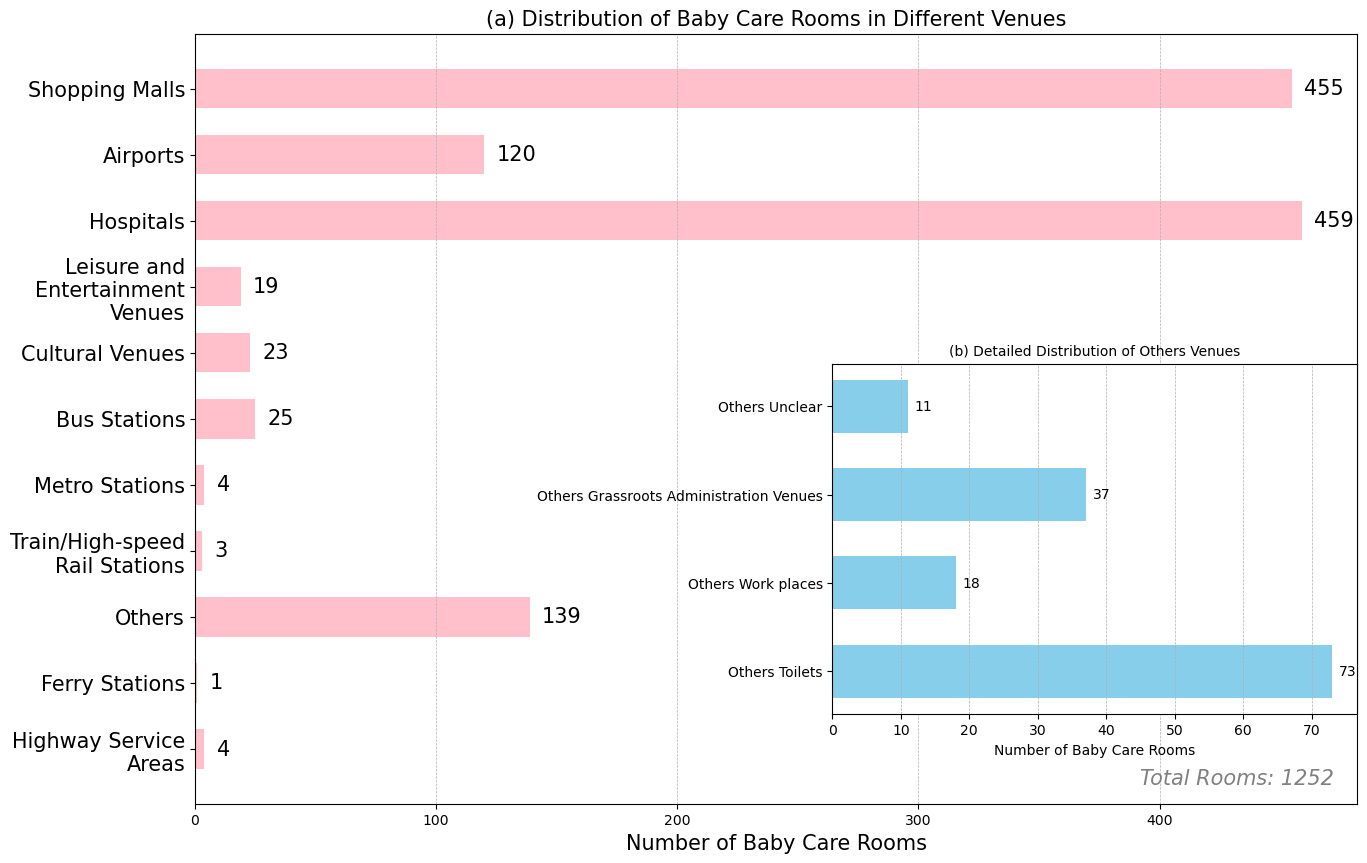

In [33]:
ordered_categories = [
    'Shopping Malls', 'Airports', 'Hospitals', 'Leisure and Entertainment Venues',
    'Cultural Venues', 'Bus Stations', 'Metro Stations', 'Train/High-speed Rail Stations',
    'Others', 'Ferry Stations', 'Highway Service Areas'
]

bcr_c_2023['categories'] = pd.Categorical(bcr_c_2023['categories'], categories=ordered_categories, ordered=True)
bcr_c_2023 = bcr_c_2023.sort_values('categories', ascending=True)

ordered_categories = ordered_categories[::-1]

total_rooms = bcr_c_2023['counts'].sum()

fig, ax1 = plt.subplots(figsize=(15, 10))

for category in ordered_categories:
    category_data = bcr_c_2023[bcr_c_2023['categories'] == category]
    if not category_data.empty:
        count = category_data['counts'].iloc[0]
    else:
        count = 0 
    ax1.barh(category, count, color='pink', height=0.6)
    ax1.text(count + 5, category, f'{count}', va='center', ha='left', color='black', fontsize=15)


ax1.set_xlabel('Number of Baby Care Rooms', fontsize=15)
ax1.set_title('(a) Distribution of Baby Care Rooms in Different Venues', fontsize=15)
ax1.grid(True, axis='x', linestyle='--', linewidth=0.5)

ax1.set_yticks(range(len(ordered_categories)))
ax1.set_yticklabels(ordered_categories, fontsize=15, wrap=True)

ax1.text(0.98, 0.02, f'Total Rooms: {total_rooms}', transform=ax1.transAxes,
         ha='right', va='bottom', fontsize=15, color='grey', style='italic')

left, bottom, width, height = 0.55, 0.2, 0.35, 0.35 
ax2 = fig.add_axes([left, bottom, width, height]) 

other_categories = ['Others Toilets', 'Others Work places', 'Others Grassroots Administration Venues', 'Others Unclear']
other_counts = [
    others_toilets_2023.shape[0],
    others_work_places_2023.shape[0],
    others_grassroots_service_or_governance_organizations_2023.shape[0],
    residue_13.shape[0]
]

for i, category in enumerate(other_categories):
    ax2.barh(category, other_counts[i], color='skyblue', height=0.6)
    ax2.text(other_counts[i] + 1, category, f'{other_counts[i]}', va='center', ha='left', color='black', fontsize=10)

ax2.set_xlabel('Number of Baby Care Rooms', fontsize=10)
ax2.set_title('(b) Detailed Distribution of Others Venues', fontsize=10)
ax2.grid(True, axis='x', linestyle='--', linewidth=0.5)

ax2.set_yticks(range(len(other_categories)))
ax2.set_yticklabels(other_categories, fontsize=10, wrap=True)

plt.savefig('output/figure 4.5.png', dpi=300)
plt.show()

# current situations

In [34]:
survey_facility_2019_data= {
    'category': [
        "Diaper-changing tables",
        "Disposable Sanitary products",
        "Free Diapers",
        "Breastfeeding and Lounge chairs",
        "Private Breastfeeding Rooms",
        "Refrigerators and Disinfection Cabinets",
        "Bottle Warmers",
        "Drinking and Hot Water)",
        "Baby Chairs",
        "Family Restrooms",
        "Washbasins",
        "Automated Vending Machine for Maternity and Infant Products",
        "Smart Soothing Devices",
        "Entertainment areas"
    ],
    'always_seen': [
        91.03, 14.31, 6.87, 73.20, 45.86, 2.56, 10.38, 20.76, 16.83, 15.18, 66.29, 5.13, 0.70, 3.93
    ],
    'seen_as_essential': [
        92.64, 43.76, 22.99, 86.27, 74.48, 23.08, 48.18, 74.65, 52.89, 52.52, 81.47, 40.65, 15.96, 14.68
    ],
    'seen_as_perfect': [
        89.58, 73.61, 59.76, 89.78, 87.88, 56.91, 78.29, 84.00, 80.93, 72.29, 85.73, 74.90, 55.42, 54.09
    ]
}

survey_facility_2019 = pd.DataFrame(survey_facility_2019_data)

survey_facility_2019.head(20)

,category,always_seen,seen_as_essential,seen_as_perfect
0,Diaper-changing tables,91.03,92.64,89.58
1,Disposable Sanitary products,14.31,43.76,73.61
2,Free Diapers,6.87,22.99,59.76
3,Breastfeeding and Lounge chairs,73.20,86.27,89.78
4,Private Breastfeeding Rooms,45.86,74.48,87.88
5,Refrigerators and Disinfection Cabinets,2.56,23.08,56.91
6,Bottle Warmers,10.38,48.18,78.29
7,Drinking and Hot Water),20.76,74.65,84.00
8,Baby Chairs,16.83,52.89,80.93
9,Family Restrooms,15.18,52.52,72.29


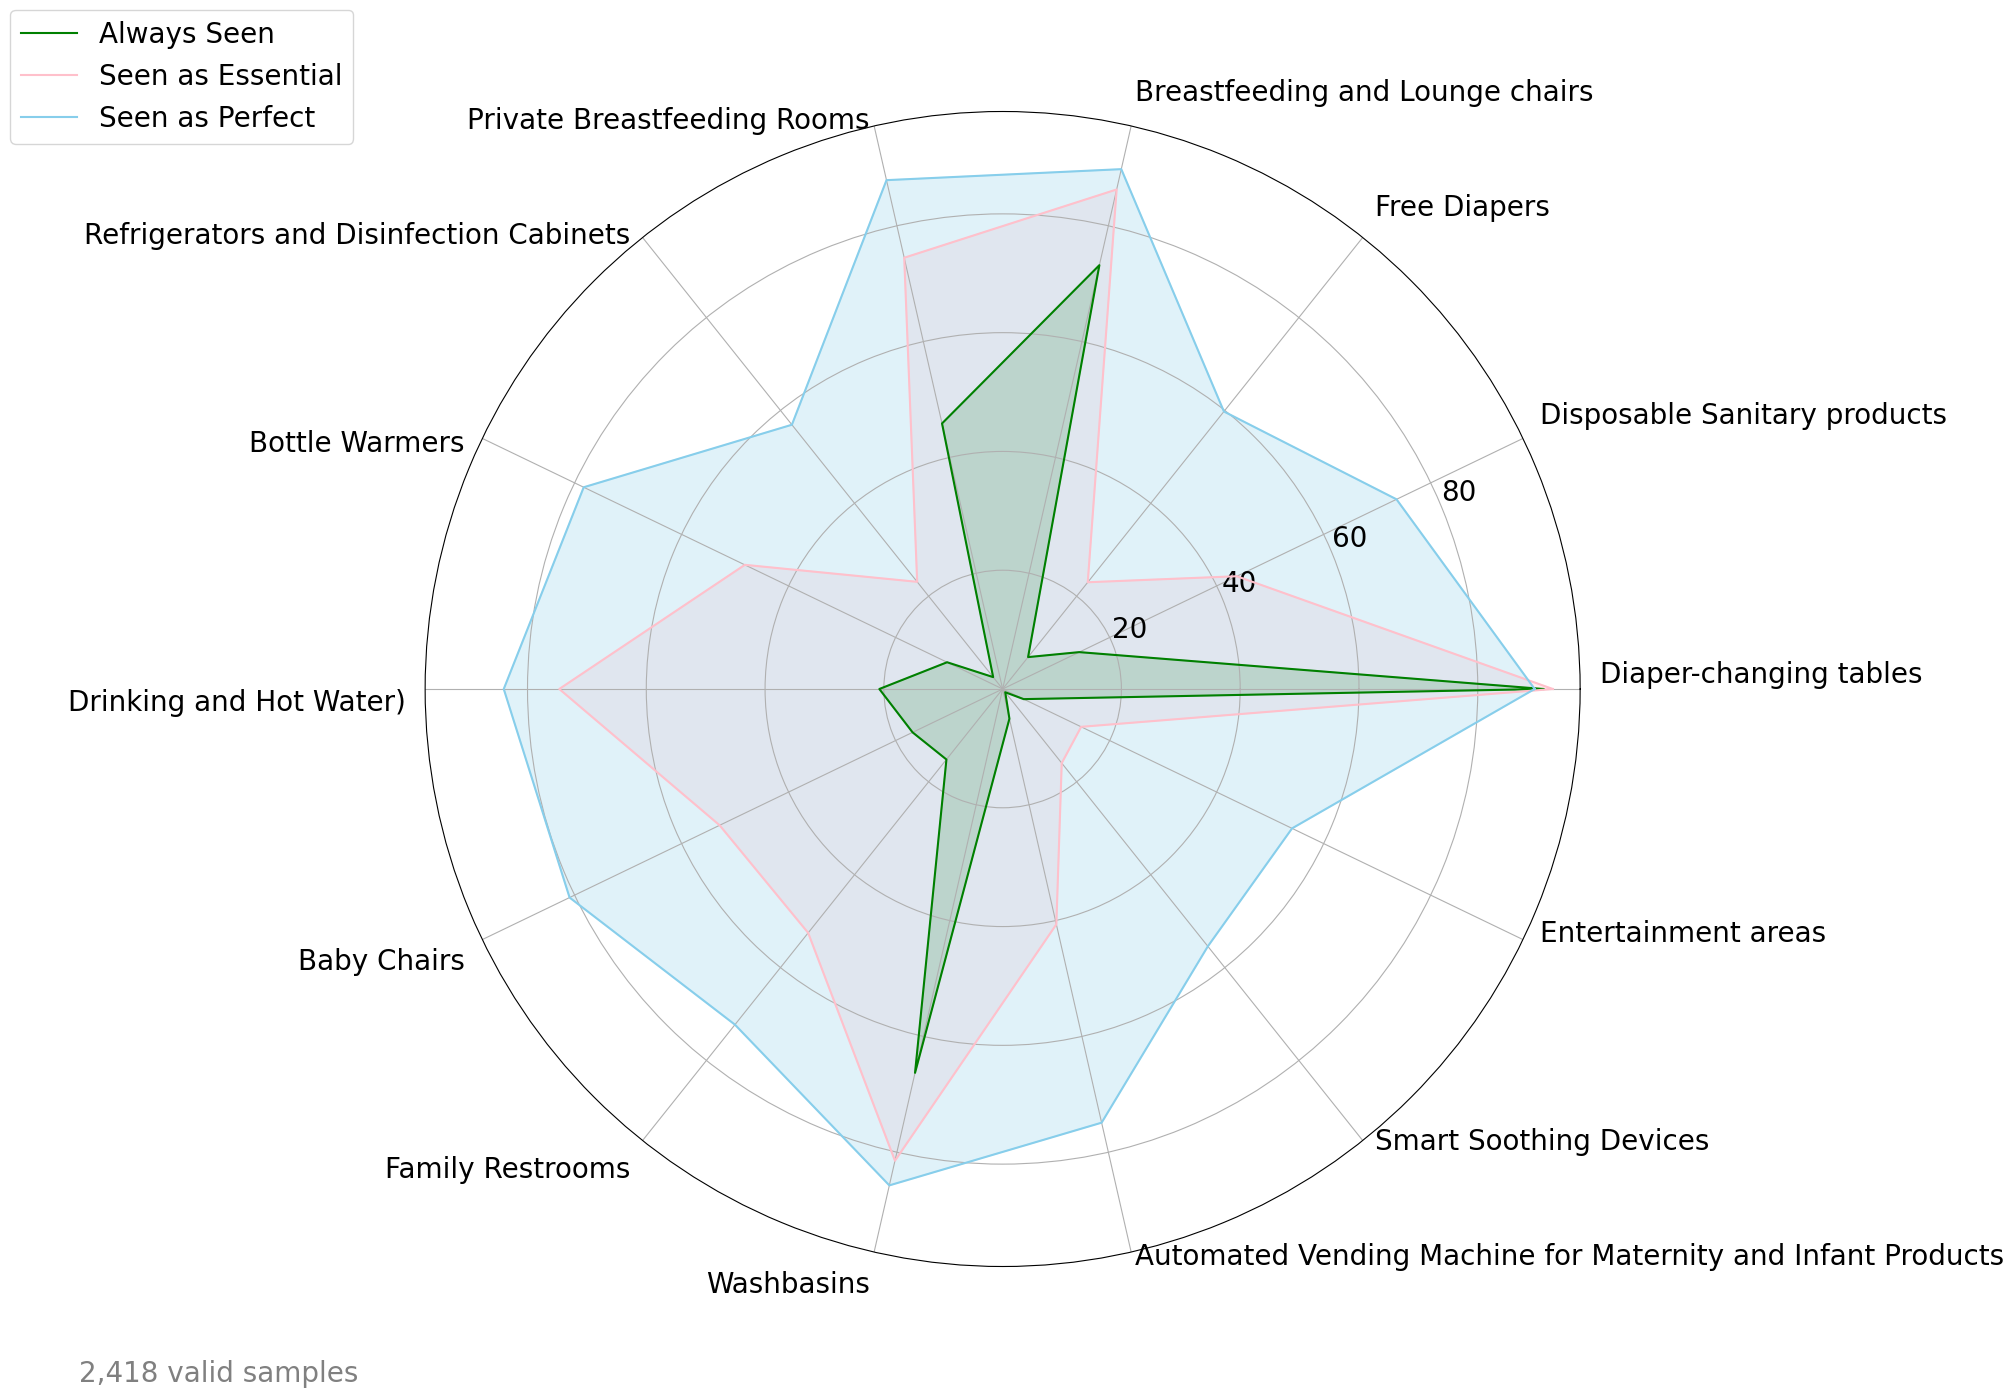

In [35]:
angles = np.linspace(0, 2 * np.pi, len(survey_facility_2019), endpoint=False).tolist()
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(21, 15), subplot_kw=dict(polar=True))

for column, color, label in zip(['always_seen', 'seen_as_essential', 'seen_as_perfect'], 
                                ['green', 'pink', 'skyblue'], 
                                ['Always Seen', 'Seen as Essential', 'Seen as Perfect']):
    values = survey_facility_2019[column].tolist()
    values += values[:1] 
    ax.plot(angles, values, label=label, color=color)
    ax.fill(angles, values, color=color, alpha=0.25)
    
ax.set_thetagrids(np.degrees(angles[:-1]), survey_facility_2019['category'], fontsize=20) 

for label, angle in zip(ax.get_xticklabels(), angles):
    angle = np.degrees(angle)
    if angle < 90 or angle > 270:
        label.set_rotation(angle - 45)
        label.set_va('bottom')
        label.set_ha('left')
    else:
        label.set_rotation(angle + 135)
        label.set_va('top')
        label.set_ha('right')

ax.tick_params(axis='y', labelsize=20)

plt.legend(loc='upper right', bbox_to_anchor=(-0.05, 1.1), fontsize=20) 

text = ax.text(-0.3, -0.1, '2,418 valid samples', transform=ax.transAxes, fontsize=20, ha='left', color='grey')  

bbox = text.get_window_extent(renderer=fig.canvas.get_renderer())
bbox = bbox.transformed(ax.transAxes.inverted())
rect = patches.FancyBboxPatch((bbox.x0, bbox.y0), bbox.width, bbox.height, 
                              boxstyle="round,pad=0.1", linewidth=1.5, 
                              edgecolor='black', facecolor='none', transform=ax.transAxes)
ax.add_patch(rect)

plt.savefig('output/figure 4.6.png', dpi=300)

plt.show()

## facility description

In [36]:
level_1 = bcr_2023[bcr_2023['services'].isin(['母婴室', '不详', '婴儿安全座椅'])]

level_1.to_csv('Output/level_1.csv', index=False, encoding='utf_8_sig')
print("Updated level_1.csv saved to: Output/level_1.csv")

remaining_1 = bcr_2023[~bcr_2023['services'].isin(['母婴室', '不详', '婴儿安全座椅'])]

remaining_1.to_csv('Output/remaining_1.csv', index=False, encoding='utf_8_sig')
print("remaining_1.csv saved to: Output/remaining_1.csv")

Updated level_1.csv saved to: Output/level_1.csv
remaining_1.csv saved to: Output/remaining_1.csv


In [37]:
services_to_filter = [
    "婴儿哺乳、婴儿护理（换尿布）",
    "婴儿喂养、婴儿护理（换尿布）",
    "婴儿喂哺、婴儿护理（换尿布）",
    "婴儿喂养、婴儿护理（换尿布）、孕妇休息",
    "婴儿喂哺、婴儿护理（换尿布）、孕妇休息",
    "婴儿喂养、婴儿护理（换尿布）、婴儿休息",
    "婴儿喂养、婴儿护理（换尿布）、母婴休息",
    "婴儿喂哺、婴儿护理（换尿布）、四期女工休息等交流场所",
    "婴儿喂哺",
    "婴儿护理（换尿布)",
    "婴儿护理（换尿布）",
    "婴儿护理台",
    "婴儿护理",
    "婴儿喂哺 婴儿护理（换尿布）",
    "婴儿喂哺、婴儿护理（换尿布）、母婴休息",
    "哺乳室及护理操作台",
    "婴儿喂哺、婴儿护理（换尿布）、婴儿床",
    "婴儿喂哺、婴儿护理（换尿布）、洗手台",
    "座椅供哺乳休息、婴儿打理台可供婴儿护理（换尿布）、洗手台可供洗手",
    "婴儿换尿布台、休息室",
    "婴儿喂哺、更换尿布、四期女工休息等交流场所",
    "婴儿护理（换尿布）、沙发",
    "婴儿喂哺、婴儿护理（换尿布）、母婴休息、清洗",
    "婴儿护理台、婴儿安全座椅、哺乳凳",
    "母乳喂养座、换尿布床",
    "婴儿护理床、凳子、洗手台",
    "婴儿喂哺、婴儿护理（换尿布）、三期女职工休息",
]

level_2 = remaining_1[remaining_1['services'].isin(services_to_filter)]

level_2.to_csv('Output/level_2.csv', index=False, encoding='utf_8_sig')
print("Updated level_2.csv saved to: Output/level_2.csv")

level_3 = remaining_1[~remaining_1['services'].isin(services_to_filter)]

level_3.to_csv('Output/level_3.csv', index=False, encoding='utf_8_sig')
print("Updated level_3.csv saved to: Output/level_3.csv")

Updated level_2.csv saved to: Output/level_2.csv
Updated level_3.csv saved to: Output/level_3.csv


In [38]:
count_level_1 = len(level_1)
count_level_2 = len(level_2)
count_level_3 = len(level_3)

total_rooms = 1252

percentage_level_1 = (count_level_1 / total_rooms) * 100
percentage_level_2 = (count_level_2 / total_rooms) * 100
percentage_level_3 = (count_level_3 / total_rooms) * 100

level = pd.DataFrame({
    'level': [1, 2, 3],
    'counts': [count_level_1, count_level_2, count_level_3],
    'percentage': [percentage_level_1, percentage_level_2, percentage_level_3]
})

level.head()

,level,counts,percentage
0,1,439,35.063898
1,2,514,41.054313
2,3,299,23.881789


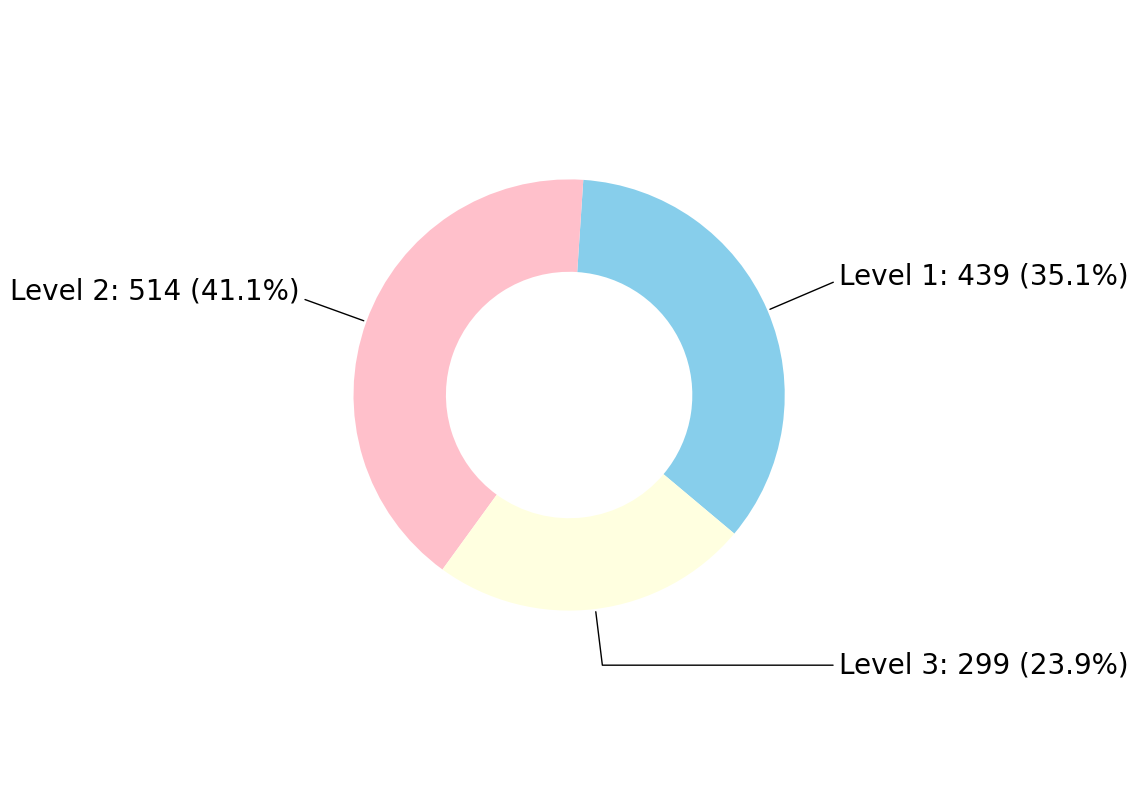

In [39]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw=dict(aspect="equal"))

data = level['counts']
labels = [f'Level {lvl}: {cnt} ({perc:.1f}%)' for lvl, cnt, perc in zip(level['level'], level['counts'], level['percentage'])]

colors = ['skyblue', 'pink', 'lightyellow'] 

radius = 0.7  
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=-40, colors=colors, radius=radius)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x * radius, y * radius), xytext=(1.25 * radius * np.sign(x), 1.3 * radius * y),
                horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle), fontsize=20)

plt.savefig('output/figure 4.7.png', dpi=300)

plt.show()